
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 3 - Q Learning </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2023 - Nov 30, 2023</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Cartpole </a>
* <a href='#2.'> 3. Lunar Lander </a>
* <a href='#4.'> 4. Submitting </a>
* <a href='#4.1'> 4.1 Feedback </a>
* <a href='#5'> References</a>

<a href='#T1'><b>Student Task 1.</b> Implementing Q-Learning  (25 points) </a>\
<a href='#T2'><b>Student Task 2.</b> Visualizing the Value Function (10 points) </a>\
<a href='#Q1'><b>Student Question 2.1</b> Analyzing the Value Function Heatmap (15 points) </a>\
<a href='#T3'><b>Student Task 3.</b> Investigating Initial Values (10 points) </a>\
<a href='#Q2'><b>Student Question 3.1</b> Analyzing Initial Values (5 points) </a>\
<a href='#Q3'><b>Student Question 3.2</b> Exploration (15 points) </a>\
<a href='#T4'><b>Student Task 4.</b> Using Q-Learning on the Lunar Lander Environment (5 points) </a>\
<a href='#Q4'><b>Student Question 4.1</b> Lunar Lander Performance (15 points) </a>

**Total Points:** 100

## 1. Introduction <a id='1.'></a>

In this exercise, you'll be applying grid-based Q-learning to the **Cartpole** and **LunarLander** environments.

## 1.1 Learning Objectives: <a id='1.1'></a>
- To understand and develop intuition about Q-learning.
- To understand simple exploration methods like GLIE and how exploration effects learning

## 1.2 Code Structure & Files <a id='1.2'></a>

You don’t have to edit any other file other than ```ex3.ipynb``` to complete this exercise.

```
├───cfg                           # Config files for environments e.g. define the maximum number of steps in an episode.
├───imgs                          # Images used in notebook
├───results
│   ├───CartPole-v1
│   │   └───video                  # Videos saved
│   │   │   logging.pkl            # Contains logged data
│   │   │   *q_table_e.pkl         # Contains qtable data for epsilon fixed
│   │   │   *q_table_glie.pkl      # Contains qtable data for glie
│   │   │   *e.png                 # Contains training performance plot for epsilon fixed
│   │   │   *glie.png              # Contains training performance plot for glie
│   ├───LunarLander-v2
│   │   └───video
│   │   │   logging.pkl
│   │   │   *q_table_e.pkl
│   │   │   *q_table_glie.pkl
│   │   │   *e.png                 
│   │   │   *glie.png              
│   ex3.ipynb                      # Main assignment file containing tasks <---------
│   setup.py                       # Contains setup function
│   utils.py                       # Contains useful functions 
```


## 2. Cartpole <a id='2.'></a>

Recall the Cartpole environment from Exercise 1.


<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing Q-Learning  (25 points) </h3> 

Implement Q-learning as presented in [Sutton and Barto, 2017, Section 6.5][1] for the Cartpole environment. Once you've successfully implemented the `get_action` and `update_q_value` functions,
you can compare the two exploration methods:

1. Use a constant value of $\epsilon = 0.1$:
    
- Training:
    ```python
    # Training with constant epsilon 0.1
    cfg_args = dict(epsilon=0.1, save_video=False)
    train(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args)
    ```
- Testing:
    ```python
    # Testing with constant epsilon 0.1
    cfg_args = dict(epsilon=0.1, save_video=True)
    test(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args)
    ```
- Visualization: To record and visualize the agent's performance, you could set `save_video=True` and run the following:

    ```python
    Video(Path().cwd()/'results' / 'CartPole-v1' / 'video' / 'test' / 'ex3-episode-0.mp4', embed=True, html_attributes="loop autoplay")
    ```

2. Implement **GLIE** (i.e., *Greedy in the Limit with Infinite Exploration*), which reduces the value of $\epsilon$ over time. For **GLIE**, the goal is to reach $\epsilon = 0.1$ after 20,000 episodes. Round the value of constant `glie_b` to the nearest integer. For details on the formula, refer to **[Lecture 3]**.
    
- Training (Ensure you've determined the correct value for `glie_b`):  
    ```python
    # Training with GLIE
    cfg_args = dict(epsilon='glie', glie_b=<insert-correct-value>, save_video=False) # insert correct value for glie_b
    train(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args) # < 30 mins
    ```
- Testing:
 
    ```python
    # Testing with GLIE
    cfg_args = dict(epsilon='glie', save_video=True)
    test(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args)
    ```
- Visualization: To record and visualize the agent's performance, you could set `save_video=True` and run the following:

    ```python
    Video(Path().cwd() / 'results' / 'CartPole-v1' / 'video' / 'test' / 'ex3-episode-0.mp4', embed=True, html_attributes="loop autoplay")
    ```
    
These videos will be stored in the **results** folder.

**Note:** Before you proceed with the "Training with GLIE" method, ensure you have completed the "Training with a constant epsilon" steps. Since the video save path is the same, the results will be overwritten.

---

**Please attach the following files to your submission:**

- Training performance plots:
  - `task1_e.png`: This file represents the episode versus the smoothed episodic reward for the constant exploration rate.
  - `task1_glie.png`: This file represents the episode versus the smoothed episodic reward for GLIE.

- Q-table files:
  - `task1_q_table_e.pkl`: Q-table for the constant exploration rate.
  - `task1_q_table_glie.pkl`: Q-table for GLIE.

Ensure all files are correctly named and included.


<figure style="text-align: center">
<img src="imgs/ep_reward.png" width="600px">
<figcaption style="text-align: center"> Figure 1: The training performance plot should look similar to the one presented here when using GLIE  </figcaption>
</figure>

### References
[1]: http://incompleteideas.net/book/RLbook2018.pdf
[Sutton and Barto, 2017]: Sutton, Richard S., and Andrew G. Barto. "Reinforcement Learning: An Introduction (in progress)." London, England (2017).
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>



In [39]:
# --- Standard Libraries ---
from pathlib import Path
from collections import deque
import warnings
import os

# --- Third-party Libraries ---
import numpy as np  # Fundamental package for scientific computing
from IPython.display import Video  # For displaying videos in the notebook
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Custom Modules ---
from setup import setup  # Setup functions for training
import utils as u  # Helper functions for the notebook

# --- Configurations ---
# Set working directory to 'results'
work_dir = Path().cwd() / 'results'

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:
def init_q_table(observation_space, action_dim, discr, bool_position=None, init_q=0.):
    """
    Initialize a Q-table for the given observation space and actions.
    
    Parameters:
    - observation_space: The state space of the environment.
    - action_dim: The number of possible actions.
    - discr: The number of divisions for discretization.
    - bool_position: Indexes where the observation space has boolean values.
    - init_q: Initial value for the Q-table.
    
    Returns:
    - axis: A list of numpy arrays representing the discrete states. 
            Each array's length corresponds to either 'discr' or 2 (for boolean values).
    - q_table: The initialized Q-table. Its shape is determined by [*axis dimensions, action_dim].
               For example, if the axis dimensions were [10, 10] and action_dim was 3, 
               the q_table shape would be [10, 10, 3].
    """
    high_values = observation_space.high
    low_values = observation_space.low
    axis = []
    for idx, (low_val, high_val) in enumerate(zip(low_values, high_values)):
        # here to avoid inf boundary, we truncate the value to [-4, 4] 
        if low_val < -1e10: low_val = -4
        if high_val > 1e10: high_val = 4
        
        if (bool_position is not None) and (idx in bool_position):
            axis.append(np.linspace(low_val, high_val, 2, dtype=np.float32)) # for boolean, we only have two values: 1., 0.
        else:
            axis.append(np.linspace(low_val, high_val, discr, dtype=np.float32))
    _shape = [ax.shape[0] for ax in axis] + [action_dim]
    q_table = np.zeros(_shape) + init_q
    return axis, q_table

def get_table_idx(state, axis):
    """
    Give a state, discretize it, and return the index in each dimension (axis). 
    With the returned index, you can access q(s,.) with q_table[idx].
    
    Parameters:
    - state: The state to be discretized. 
    - axis: The discrete state space as a list of numpy arrays. 
    
    Returns:
    - idx: A tuple representing the index of the discretized state in the Q-table. 
           Its shape matches the dimensions of the provided 'axis'.
    """
    def _get_ax_idx(ax, value):
        return np.argmin(np.abs(ax - value))
    return tuple([_get_ax_idx(ax, value) for ax, value in zip(axis, state)])

In [41]:
def get_action(state, q_axis, q_table, epsilon=0.0):
    """
    Determine the action to take based on epsilon-greedy strategy.
    
    Parameters:
    - state: The current state of the agent.
    - q_axis: The discrete state space as a list of numpy arrays.
    - q_table: The Q-table with learned values.
    - epsilon: The probability with which a random action is taken (exploration). 
               Default is 0 (purely greedy).
    
    Returns:
    - action: The chosen action, either greedily or randomly based on epsilon.
    """
    # if epsilon == 0.0, the policy will be greedy -- always choose the best action

    # TODO: Task 1, implement epsilon-greedy
    # 1. Discretize the given state by using the get_table_idx(state, axis) function
    # 2. Use the discretized state's index to access the Q-table
    # 3. Generate a random number between 0 and 1.
    # 4. Compare this number to `epsilon`
    # 5. If the random number is less than `epsilon`, choose a random action.
    # 6. Otherwise, choose the best action (greedy action)
    ########## Your code starts here ##########
    discretize = get_table_idx(state,q_axis)
    q_value = q_table[discretize]
    r = np.random.rand()
    
        
    if r < epsilon:
        action = np.random.randint(len(q_value))
    else:
        action = np.argmax(q_value)
        
    ########## Your code ends here #########
    return action


def update_q_value(old_state, action, new_state, gamma, reward, done, alpha, q_axis, q_table):
    """
    Update the Q-value for a state-action pair based on the Q-learning update rule.
    
    Parameters:
    - old_state: The original state before taking the action.
    - action: The action taken.
    - new_state: The state after taking the action.
    - gamma: Discount factor.
    - reward: Immediate reward for taking the action.
    - done: Boolean indicating if the episode is done.
    - alpha: Learning rate.
    - q_axis: The discrete state space as a list of numpy arrays.
    - q_table: The Q-table with learned values.
    
    Returns:
    - q_table: Updated Q-table.
    """

    # q_table contains discretized state-action space (16, 16, 16, 16, 2) values
    # Each observation is discritized 16 times and the last dimension are the two
    # actions that can be taken. 
    
    # TODO: Task 1, update q value
    # 1. Retrieve Old Q-Value
    # 2. Determine the Next Action
    # 3. Retrieve New Q-Value
    #     If the episode isn't done, get the Q-value for the new_state and next_action.
    #     If the episode is done, set the new Q-value to zero.
    # 4. Compute the Updated Q-Value
    # 5. Update the Q-Table 
    # 6. Return the Updated Q-Table
    old_table_idx = get_table_idx(old_state, q_axis) # idx of q(s_old, *)
    new_table_idx = get_table_idx(new_state, q_axis) # idx of q(s_new, *)  
    ########## Your code starts here ##########
    
    old_q_value = q_table[old_table_idx][action]
    
    if not done:
        new_table_idx = get_table_idx(new_state, q_axis)
        next_action = np.argmax(q_table[new_table_idx])
    else:
        next_action = None
        
    if next_action is not None:
        new_q_value = q_table[new_table_idx][next_action]
    else:
        new_q_value = 0.0
        
    updated_q_value = old_q_value + alpha * (reward + gamma * new_q_value - old_q_value)
    
    q_table[old_table_idx][action] = updated_q_value
    
    ########### Your code ends here ########## 
    return q_table

In [42]:
def plot_training_data(training_data, save_path):
    df = pd.DataFrame(training_data)
    plt.figure(figsize=(5, 3.5))
    sns.lineplot(data=df, x='episode', y='ep_reward_avg')
    plt.title('Training Performance')
    plt.savefig(save_path)
    plt.show()

def train(cfg_path, cfg_args={}):
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    performance_data = []

    # init q_table with zeros
    q_axis, q_table = init_q_table(env.observation_space, 
        env.action_space.n, cfg.discr, bool_position=cfg.bool_position, init_q=cfg.initial_q)

    # begin training and testing
    ep_reward_deque = deque([], maxlen=500)  # used to calculate the smoothed (avg over recent 500 episodes) ep_reward
    for ep in range(cfg.train_episodes + 1):
        # set epsilon value
        if cfg.epsilon == 'glie':
            epsilon = cfg.glie_b / (cfg.glie_b + ep)  
        elif isinstance(cfg.epsilon, (int, float)):
            epsilon = cfg.epsilon
        else: 
            raise ValueError
        
        (state, _), done, ep_reward, timesteps = env.reset(seed=cfg.seed), False, 0, 0
        while not done:
            action = get_action(state, q_axis, q_table, epsilon=epsilon) 
            new_state, reward, done, _, _ = env.step(action)
            q_table = update_q_value(state, action, new_state, cfg.gamma, reward, done, cfg.alpha,
                                        q_axis, q_table)
    
            state = new_state
            ep_reward += reward
            timesteps += 1
            if timesteps >= env.spec.max_episode_steps:
                done = True
                
        ep_reward_deque.append(ep_reward)
        info = {
            'episode': ep,
            'epsilon': epsilon,
            'ep_reward': ep_reward,
            'timesteps': timesteps,
            'ep_reward_avg': np.mean(list(ep_reward_deque))
        }

        performance_data.append(info)
        

        if (not cfg.silent) and (ep % 500 == 0): print(info)
    
    work_dir = Path().cwd()/'results'/f'{cfg.env_name}'
      
    # save the q-value table and q_axis
    file_pre = f"{cfg.task_no}_" if hasattr(cfg, 'task_no') else ""
    file = file_pre + 'q_table_glie.pkl' if cfg.epsilon == 'glie' else file_pre + 'q_table_e.pkl'
    u.save_object({'q_table': q_table, 'axis': q_axis},
                        work_dir/file)
    png_file = file_pre + '_glie.png' if cfg.epsilon == 'glie' else file_pre + '_e.png'
    plot_training_data(performance_data, work_dir/png_file)
    print('Training done!')

    
def test(cfg_path, cfg_args={'testing':True}):
    # test under random seed for each episode
    seed = np.random.randint(0, 10000)
    
    cfg_args.update({'testing':True})
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    
    work_dir = Path().cwd()/'results'/f'{cfg.env_name}'
    
    # load q_table
    file_pre = f"{cfg.task_no}_" if hasattr(cfg, 'task_no') else ""
    file = file_pre + 'q_table_glie.pkl' if cfg.epsilon == 'glie' else file_pre + 'q_table_e.pkl'
    data = u.load_object(work_dir/file)
    q_axis, q_table = data['axis'], data['q_table']

    # begin testing
    avg_ep_reward = 0
    for ep in range(cfg.test_episodes):
        (state, _), done, ep_reward, timesteps = env.reset(seed=seed + ep), False, 0, 0
        while not done:
            action = get_action(state, q_axis, q_table, epsilon=0.0) # be greedy during testing
            new_state, reward, done, _, _ = env.step(action)

            state = new_state
            ep_reward += reward
            timesteps += 1
            if timesteps >= env.spec.max_episode_steps:
                done = True
        
        info = {
            'test_episode': ep,
            'test_ep_reward': ep_reward,
            'timesteps': timesteps,
        }
        avg_ep_reward += ep_reward
   
        if not cfg.silent: 
            print(info)
    
    print(f'Testing done! Average test reward is {avg_ep_reward / cfg.test_episodes}')

Numpy/Torch/Random Seed:  409
{'episode': 0, 'epsilon': 0.1, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 500, 'epsilon': 0.1, 'ep_reward': 11.0, 'timesteps': 11, 'ep_reward_avg': 11.05}
{'episode': 1000, 'epsilon': 0.1, 'ep_reward': 45.0, 'timesteps': 45, 'ep_reward_avg': 19.282}
{'episode': 1500, 'epsilon': 0.1, 'ep_reward': 83.0, 'timesteps': 83, 'ep_reward_avg': 73.554}
{'episode': 2000, 'epsilon': 0.1, 'ep_reward': 87.0, 'timesteps': 87, 'ep_reward_avg': 98.872}
{'episode': 2500, 'epsilon': 0.1, 'ep_reward': 105.0, 'timesteps': 105, 'ep_reward_avg': 103.666}
{'episode': 3000, 'epsilon': 0.1, 'ep_reward': 112.0, 'timesteps': 112, 'ep_reward_avg': 103.27}
{'episode': 3500, 'epsilon': 0.1, 'ep_reward': 61.0, 'timesteps': 61, 'ep_reward_avg': 106.196}
{'episode': 4000, 'epsilon': 0.1, 'ep_reward': 128.0, 'timesteps': 128, 'ep_reward_avg': 117.112}
{'episode': 4500, 'epsilon': 0.1, 'ep_reward': 134.0, 'timesteps': 134, 'ep_reward_avg': 121.996}
{'episode': 500

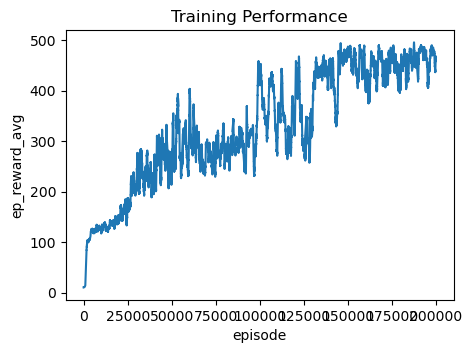

Training done!


In [43]:
# Training with constant epsilon 0.1
cfg_args = dict(epsilon=0.1, save_video=False)
train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args) # < 30 mins

In [46]:
# Testing with constant epsilon 0.1
cfg_args = dict(epsilon=0.1, save_video=True)
test(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args)

Numpy/Torch/Random Seed:  409


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2023/ex3/results/CartPole-v1/video/test folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


{'test_episode': 0, 'test_ep_reward': 197.0, 'timesteps': 197}
{'test_episode': 1, 'test_ep_reward': 190.0, 'timesteps': 190}
{'test_episode': 2, 'test_ep_reward': 500.0, 'timesteps': 500}
{'test_episode': 3, 'test_ep_reward': 500.0, 'timesteps': 500}
{'test_episode': 4, 'test_ep_reward': 500.0, 'timesteps': 500}
{'test_episode': 5, 'test_ep_reward': 440.0, 'timesteps': 440}
{'test_episode': 6, 'test_ep_reward': 301.0, 'timesteps': 301}
{'test_episode': 7, 'test_ep_reward': 500.0, 'timesteps': 500}
{'test_episode': 8, 'test_ep_reward': 216.0, 'timesteps': 216}
{'test_episode': 9, 'test_ep_reward': 500.0, 'timesteps': 500}
Testing done! Average test reward is 384.4


To visualize how the agent acts within the environment, execute the cell below. **Modify the path** to select the episode you'd like to observe. Remember, by default, videos are saved every 500 episodes during training.

In [47]:
# Visualizing the results with constant epsilon 0.1
Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex3-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control


**Important Reminder:** Before initiating the "Training with GLIE" process, make sure you've fully executed the steps under "Training with a constant epsilon". Be cautious, as the video save path remains identical; thus, any previous results will be overwritten.


Numpy/Torch/Random Seed:  409
{'episode': 0, 'epsilon': 1.0, 'ep_reward': 19.0, 'timesteps': 19, 'ep_reward_avg': 19.0}
{'episode': 500, 'epsilon': 0.8163115356355621, 'ep_reward': 18.0, 'timesteps': 18, 'ep_reward_avg': 23.246}
{'episode': 1000, 'epsilon': 0.6896337678460583, 'ep_reward': 28.0, 'timesteps': 28, 'ep_reward_avg': 32.684}
{'episode': 1500, 'epsilon': 0.5969908651262762, 'ep_reward': 58.0, 'timesteps': 58, 'ep_reward_avg': 45.912}
{'episode': 2000, 'epsilon': 0.5262908574135481, 'ep_reward': 27.0, 'timesteps': 27, 'ep_reward_avg': 59.402}
{'episode': 2500, 'epsilon': 0.470563320626853, 'ep_reward': 27.0, 'timesteps': 27, 'ep_reward_avg': 68.066}
{'episode': 3000, 'epsilon': 0.42550746840291076, 'ep_reward': 112.0, 'timesteps': 112, 'ep_reward_avg': 85.904}
{'episode': 3500, 'epsilon': 0.388325760223698, 'ep_reward': 63.0, 'timesteps': 63, 'ep_reward_avg': 94.738}
{'episode': 4000, 'epsilon': 0.3571198971391835, 'ep_reward': 152.0, 'timesteps': 152, 'ep_reward_avg': 101.86

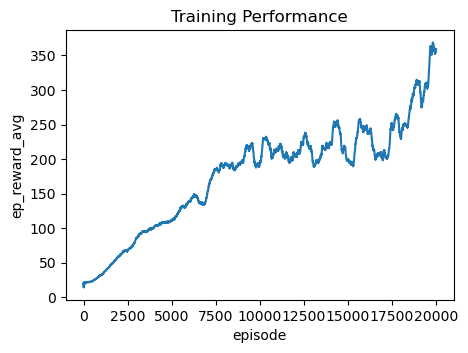

Training done!


In [16]:
# Training with GLIE
cfg_args = dict(epsilon='glie', glie_b=2222, save_video=False) # insert correct value for glie_b
train(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args) # < 30 mins

In [12]:
# Testing with GLIE
cfg_args = dict(epsilon='glie', save_video=True)
test(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args)

Numpy/Torch/Random Seed:  409


/opt/software/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /notebooks/rl2023/ex3/results/CartPole-v1/video/test folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
error: XDG_RUNTIME_DIR not set in the environment.


{'test_episode': 0, 'test_ep_reward': 315.0, 'timesteps': 315}
{'test_episode': 1, 'test_ep_reward': 500.0, 'timesteps': 500}
{'test_episode': 2, 'test_ep_reward': 269.0, 'timesteps': 269}
{'test_episode': 3, 'test_ep_reward': 448.0, 'timesteps': 448}
{'test_episode': 4, 'test_ep_reward': 235.0, 'timesteps': 235}
{'test_episode': 5, 'test_ep_reward': 324.0, 'timesteps': 324}
{'test_episode': 6, 'test_ep_reward': 412.0, 'timesteps': 412}
{'test_episode': 7, 'test_ep_reward': 290.0, 'timesteps': 290}
{'test_episode': 8, 'test_ep_reward': 271.0, 'timesteps': 271}
{'test_episode': 9, 'test_ep_reward': 500.0, 'timesteps': 500}
Testing done! Average test reward is 356.4


Just as in the "visualize the results with constant epsilon 0.1" section, **modify the path** to select the episode you'd like to observe. Remember, videos are saved every 500 episodes during training.

In [ ]:
# Visualizing the results with GLIE
Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex3-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Visualizing the Value Function (10 points) </h3> 

Use your Q-function values estimated with GLIE to calculate the optimal value function of each state. Complete the ```display_heatmap_vf()``` function below to plot the heatmap of the value function in terms of $x$ and $\theta$, such that $\theta$ is on horizontal and $x$ is on vertical axis. For plotting, average the values over $\dot{x}$ and $\dot{\theta}$. Attach the heatmap in your report.

**Hint:** For plotting the heatmap you can use Matplotlib-pyplot: ```pyplot.imshow(values_array)``` or Seaborn: ```seaborn.heatmap(values_array)```
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [8]:
# --- Standard Libraries ---
from pathlib import Path    # For handling filesystem paths in a more intuitive way

# --- Third-party Libraries ---
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # A data visualization library based on matplotlib

In [35]:
def display_heatmap_vf(env_name="CartPole-v1", q_table_name='task1_q_table_glie.pkl'):
    """
    Displays a heatmap of the value function for a given environment and Q-table.

    Input:
    - env_name (str): Name of the environment, default is "CartPole-v1".
    - q_table_name (str): Name of the saved Q-table file, default is 'q_table_glie.pkl'.

    Output:
    - Visual display of the heatmap.

    """
    
    # load the Q-value array
    work_dir = Path().cwd()/'results'/f'{env_name}'
    
    data = u.load_object(work_dir/q_table_name) # load q_table 
    q_axis, q_table = data['axis'], data['q_table'] 
    x_axis, th_axis = q_axis[0], q_axis[2]  # get the axis for x and \theta

    discr = q_table.shape[0] # get the number of discretized bins for a state variable in the Q-table

    # TODO: Task 2 Plot the heatmap of the value function
    # 1. Compute the maximum Q-value for each state, which gives the value function of that state
    # 2. Uses Seaborn and Matplotlib to display the heatmap.  
    ########## Your code begins here. ##########
    value_function = np.max(q_table, axis=-1)# -1指的是q_table的最后一个维度 也就是动作 最大Q值就是value function

    value_function = np.mean(value_function, axis=(1, 3)) #axis=(1, 3)参数表示在维度1和3上进行平均，这对应于对x_dot和theta_dot的平均值。

    plt.figure(figsize=(10, 6))
    sns.heatmap(value_function, cmap="YlGnBu", xticklabels=["{:.2f}".format(x) for x in x_axis], yticklabels=["{:.2f}".format(y) for y in th_axis])
    plt.title("Value Function Heatmap")
    plt.xlabel("X")
    plt.ylabel("theta")
    plt.show()
    
    ########## Your code ends here. ##########

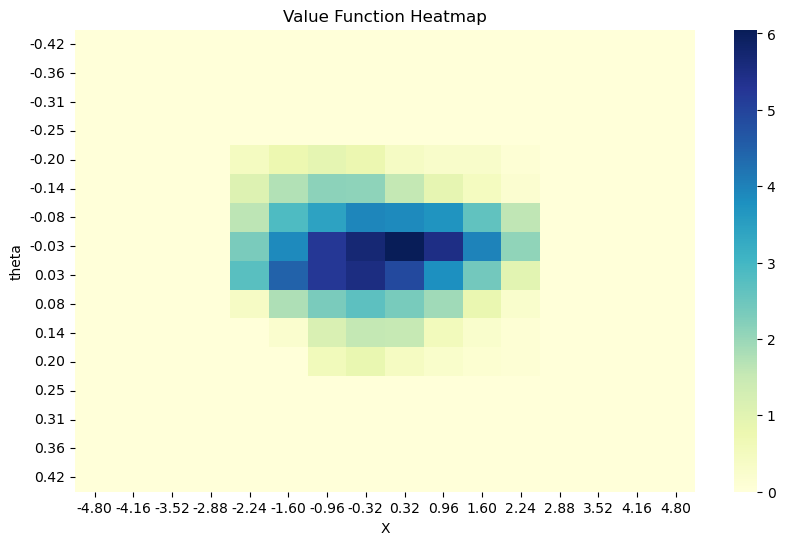

In [36]:
# Visual display of the heatmap of the value function
display_heatmap_vf()

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.1</b> Analyzing the Value Function Heatmap (15 points) </h3> 

What do you think the heatmap would have looked like:
1) before the training?
2) after a single episode?
3) halfway through the training?

***Justify why for all the cases. Attaching the plots is not required.*** 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Before the training,all value are zero because the initial setting makes them zero. After a single episode, just a few updated Q values,the rest of the grids are still zero.Half through the training,it looks almost the same as the final map, you can find it wants x_dot and theta_dot remain stable so that it can hold the entire timesteps.So the optimal policy is to keep slow velocity as slow as possible for resulting in long timesteps.

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3.</b> Investigating Initial Values (10 points) </h3> 

Set $\epsilon$ to zero, effectively making the policy greedy w.r.t. current Q-value estimates. Run the training again while
1) keeping the initial estimates of the Q function at 0,
2) setting the initial estimates of the Q function to 50 for all states and actions.

You can change the initial Q value estimates by passing ```initial_q=<value>``` in the following cells. 

**Attach training performance plots of both initializations in your report.**

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Numpy/Torch/Random Seed:  409
{'episode': 0, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 1000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 1500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 2000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 2500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 3000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 3500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 4000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 4500, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 5000, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 

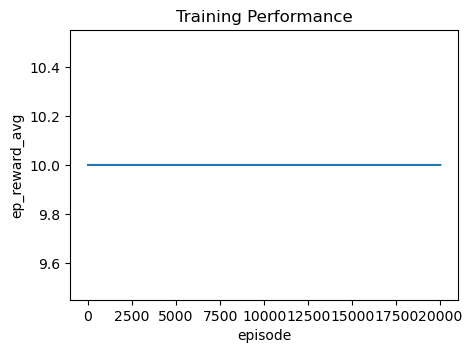

Training done!


In [68]:
# Initialize the Q function with a value of 0 and begin training
cfg_args = dict(epsilon=0, initial_q=0, task_no='task3.1') # set the initial estimates of the Q function to 0
train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=cfg_args)

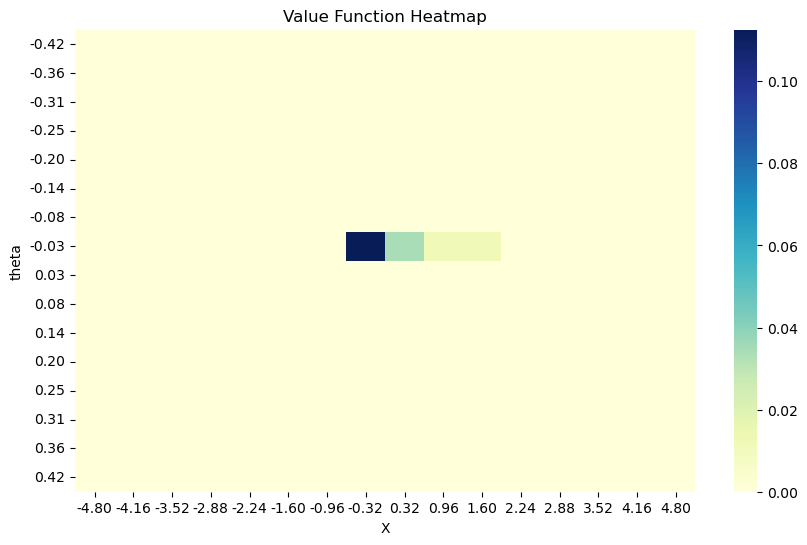

In [37]:
# Visual display of the heatmap of the value function
display_heatmap_vf('CartPole-v1', 'task3.1_q_table_e.pkl')

In [ ]:
Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex3-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

Numpy/Torch/Random Seed:  409
{'episode': 0, 'epsilon': 0, 'ep_reward': 10.0, 'timesteps': 10, 'ep_reward_avg': 10.0}
{'episode': 500, 'epsilon': 0, 'ep_reward': 244.0, 'timesteps': 244, 'ep_reward_avg': 97.872}
{'episode': 1000, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 442.83}
{'episode': 1500, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 500.0}
{'episode': 2000, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 500.0}
{'episode': 2500, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 500.0}
{'episode': 3000, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 500.0}
{'episode': 3500, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 500.0}
{'episode': 4000, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 500.0}
{'episode': 4500, 'epsilon': 0, 'ep_reward': 500.0, 'timesteps': 500, 'ep_reward_avg': 500.0}
{'episode': 5000, 'epsilon': 0, 'ep

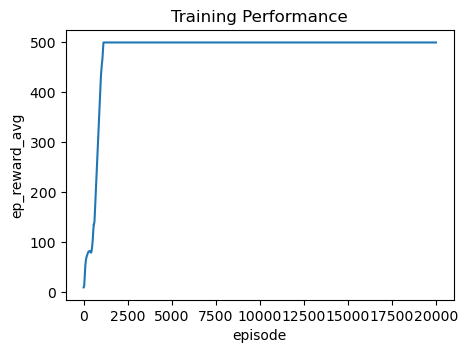

Training done!


In [70]:
# Initialize the Q function with a value of 50 and begin training
cfg_args = dict(epsilon=0, initial_q=50, task_no='task3.2') # set the initial estimates of the Q function to 50
train(cfg_path=Path().cwd() / 'cfg' / 'cartpole_v1.yaml', cfg_args=cfg_args)

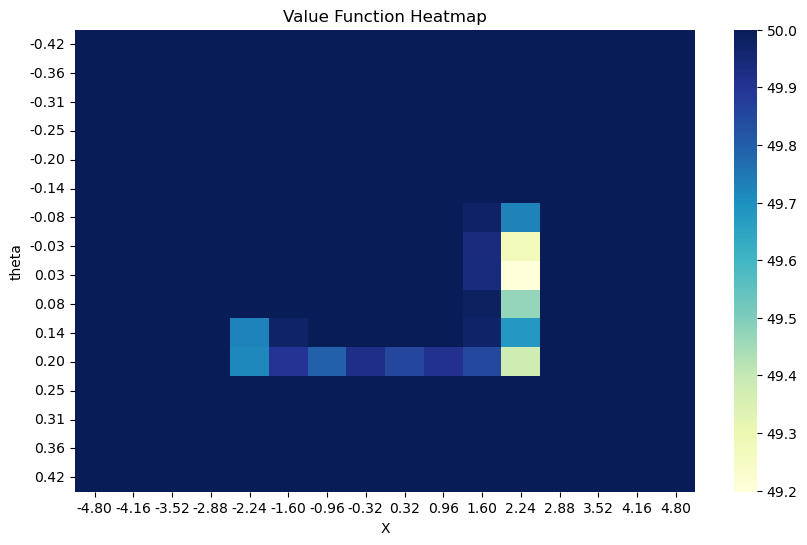

In [38]:
# Visual display of the heatmap of the value function
display_heatmap_vf('CartPole-v1', 'task3.2_q_table_e.pkl')

Based on the results you observed in Task 3, answer the following questions:

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 3.1</b> Analyzing Initial Values (5 points) </h3> 

In which case does the model perform better?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The model with initial Q = 50 performs better.

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 3.2</b> Exploration (15 points) </h3> 

Why is this the case, and how does the initialization of Q values affect exploration?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The model with Q=50 performs better because the initial high Q-values encourage thorough exploration of all state-action pairs, even when updated Q-values become smaller than the original ones. This ensures that the model considers each state at least once. Even when the exploration parameter (ε) is set to 0, the model can still explore potential new states. The effective exploration driven by the initialization of high Q-values enables the model to swiftly identify superior state-action pairs. High Q-values can expedite exploration and the discovery of good strategies but may lead to unstable learning. Low Q-values can improve learning stability but might slow down exploration. In practice, the initialization of Q-values often requires adjustments based on the specific problem and environment to strike a suitable balance.

## 3. Lunar lander <a id='3.'></a>

<figure style="text-align: center">
<img src="imgs/lunar_lander.png" width="600px">
<figcaption style="text-align: center"> Figure 2: The Lunar lander environment. </figcaption>
</figure>

The ***Lunar lander*** environment is shown in Figure 2. The goal is to make the lunar lander land on the ground between two flag poles. The agent receives a positive reward for moving towards the landing pad, landing, etc. A negative reward is given for firing the main engine (more fuel-efficient policies are better) and for crashing. Four actions are available: firing the left/right/main engines, or doing nothing (free fall). The observation vector consists of 6 continuous and 2 discrete values:

$$
o=\left(\begin{array}{llllllll}
x & y & \dot{x} & \dot{y} & \theta & \dot{\theta} & c_l & c_r
\end{array}\right)^T,
$$

where $x$ and $y$ are the coordinates of the lander, $\dot{x}$ and $\dot{y}$ its velocities, $\theta$ represents the rotation angle and $\dot{\theta}$ the angular velocity of the lander. Two discrete values $c_l$ and $c_r$  indicate whether the lander’s legs are in contact with the ground (0 or 1).


<a id='T4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 4.</b> Using Q-Learning on the Lunar Lander Environment (5 points) </h3> 

1) Run the training for Lunar Lander environment by executing the following:
```python 
cfg_args = dict(epsilon='glie', glie_b=<insert-glie-from-task1>, save_video=False, discr=12) # insert correct value for glie_b
train(cfg_path=Path().cwd()/'cfg'/'lunarlander_v2.yaml', cfg_args=cfg_args)
```
2) Run it for 20000 episodes (which was enough for the Cartpole to learn). **Attach the training performance plot in your submission.**

**Heads Up:** The generated file `task4_q_table.pkl` is sizeable, approximately 2 GB. Ensure you **delete** it before submitting.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Numpy/Torch/Random Seed:  409
{'episode': 0, 'epsilon': 1.0, 'ep_reward': -3.842115166935983, 'timesteps': 105, 'ep_reward_avg': -3.842115166935983}
{'episode': 500, 'epsilon': 0.8163115356355621, 'ep_reward': -67.070320575524, 'timesteps': 103, 'ep_reward_avg': -135.54515719889505}
{'episode': 1000, 'epsilon': 0.6896337678460583, 'ep_reward': -91.06017421064668, 'timesteps': 103, 'ep_reward_avg': -115.13134841343238}
{'episode': 1500, 'epsilon': 0.5969908651262762, 'ep_reward': -71.10496760872303, 'timesteps': 126, 'ep_reward_avg': -92.32687603887469}
{'episode': 2000, 'epsilon': 0.5262908574135481, 'ep_reward': -65.93752923959346, 'timesteps': 192, 'ep_reward_avg': -76.530091936266}
{'episode': 2500, 'epsilon': 0.470563320626853, 'ep_reward': -223.26456104021662, 'timesteps': 213, 'ep_reward_avg': -89.96072968719437}
{'episode': 3000, 'epsilon': 0.42550746840291076, 'ep_reward': -44.51728172000275, 'timesteps': 104, 'ep_reward_avg': -91.38397557569243}
{'episode': 3500, 'epsilon': 0.

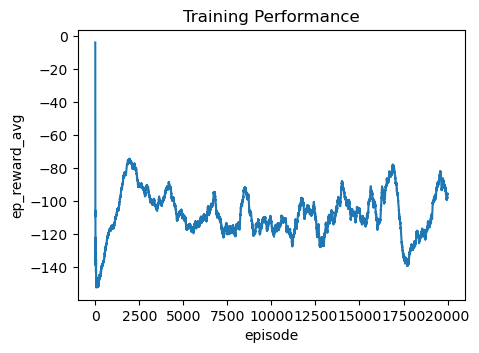

Training done!


In [72]:
# Training on the Lunar Lander Environment
cfg_args = dict(epsilon='glie', glie_b=2222, save_video=False, discr=12) # insert correct value for glie_b
train(cfg_path=Path().cwd()/'cfg'/'lunarlander_v2.yaml', cfg_args=cfg_args)

In [73]:
cfg_args = dict(epsilon='glie', save_video=True, test_episodes=5)
test(cfg_path=Path().cwd()/'cfg'/'lunarlander_v2.yaml', cfg_args=cfg_args)

Numpy/Torch/Random Seed:  409
{'test_episode': 0, 'test_ep_reward': 18.412880912504818, 'timesteps': 119}
{'test_episode': 1, 'test_ep_reward': -69.65741790852428, 'timesteps': 107}
{'test_episode': 2, 'test_ep_reward': 7.842522249457957, 'timesteps': 115}
{'test_episode': 3, 'test_ep_reward': 11.696632958350136, 'timesteps': 116}
{'test_episode': 4, 'test_ep_reward': -161.42333886611078, 'timesteps': 312}
Testing done! Average test reward is -38.625744130864426


In [74]:
Video(Path().cwd()/'results'/'LunarLander-v2'/'video'/'test'/'ex3-episode-4.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='Q4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Lunar Lander Performance (15 points) </h3> 

Does the lander learn to land between the flag poles? Why/why not?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The training results clearly demonstrate that the lunar lander failed to acquire any meaningful behaviors during the 20,000 episodes of training. Throughout this training period, there was only marginal improvement in episode lengths and rewards. Q-learning, which relies on a tabular function, is suitable for relatively simple tasks with finite state spaces. However, when dealing with continuous or complex discrete state spaces, it becomes impractical to determine Q-values through table lookup. In such cases, employing a neural network is a more viable alternative.

In the current task, the state space consists of an 8-dimensional vector, and the action space is a 4-dimensional vector. Attempting to apply Q-learning to this problem proves to be excessively intricate and challenging, making it difficult to achieve significant improvements in performance.

## 4. Submitting <a id='4.'></a>
Ensure all tasks and questions (in ```ex3.ipynb```) are answered and the relevant plots are recorded in the relevant places. Details about attaching images and figures can be found below. The relevant graphs to be included for this assignment are:


- Training performance plots:
  - `task1_e.png`: Cartpole, constant value of $\epsilon$ training performance plots in terms of episode and smoothed episodic reward
  - `task1_glie.png`: Cartpole, GLIE training performance plots in terms of episode and smoothed episodic reward
  - `task3.1_e.png`: Cartpole, training performance plots of the initial estimates of the Q function at 0 
  - `task3.2_e.png`: Cartpole, training performance plots of the initial estimates of the Q function at 50
  - `task4_glie.png`: Luner Lander, training performance plots in terms of episode and smoothed episodic reward
- Q-table files:
  - `task1_q_table_e.pkl`: Cartpole, Q-table for the constant exploration rate.
  - `task1_q_table_glie.pkl`: Cartpole, Q-table for GLIE.


Ensure the correct model files and plots are saved:
- ```results/CartPole-v1/task1_e.png``` From Task 1
- ```results/CartPole-v1/task1_glie.png``` From Task 1
- ```results/CartPole-v1/task1_q_table_e.pkl``` From Task 1
- ```results/CartPole-v1/task1_q_table_glie.pkl``` From Task 1
- ```results/CartPole-v1/task3.1_e.png``` From Task 3
- ```results/CartPole-v1/task3.2_e.png``` From Task 3
- ```results/LunarLander-v2/task4_glie.png``` From Task 4

## 4.1 Feedback <a id='4.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)

In [ ]:
hrs = 8h

2) Difficulty of each task/question from 1-5 (int or float)

In [ ]:
T1 = None   # Student Task 1. Implementing Q-Learning (25 points)
T2 = None   # Student Task 2. Visualizing the Value Function (10 points)
Q2_1 = None # Student Question 2.1 Analyzing the Value Function Heatmap (15 points)
T3 = None   # Student Task 3. Investigating Initial Values (10 points)
Q3_1 = None # Student Question 3.1 Analyzing Initial Values (5 points)
Q3_2 = None # Student Question 3.2 Exploration (15 points)
T4 = None   # Student Task 4. Using Q-Learning on the Lunar Lander Environment (5 points)
Q4_1 = None # Student Question 4.1 Lunar Lander Performance (15 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [ ]:
T1 = None   # Student Task 1. Implementing Q-Learning (25 points)
T2 = None   # Student Task 2. Visualizing the Value Function (10 points)
Q2_1 = None # Student Question 2.1 Analyzing the Value Function Heatmap (15 points)
T3 = None   # Student Task 3. Investigating Initial Values (10 points)
Q3_1 = None # Student Question 3.1 Analyzing Initial Values (5 points)
Q3_2 = None # Student Question 3.2 Exploration (15 points)
T4 = None   # Student Task 4. Using Q-Learning on the Lunar Lander Environment (5 points)
Q4_1 = None # Student Question 4.1 Lunar Lander Performance (15 points)

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
And other feedback you think is worth including. Type in the box below

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE

## References <a id='5'></a>
[1]: http://incompleteideas.net/book/RLbook2018.pdf
[Sutton and Barto, 2017]: Sutton, Richard S., and Andrew G. Barto. "Reinforcement Learning: An Introduction (in progress)." London, England (2017).